In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("data/train.csv")

In [7]:
df = pd.DataFrame(data)

In [15]:
# 檢視數據前幾行
df.head()
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 7500 entries, 0 to 7499

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [46]:
# 房屋持有欄位，名稱
print(df['Home Ownership'].name)
# 房屋持有欄位物件 有哪些內容 
print(df["Home Ownership"].unique())
# 房屋持有欄位物件，各數量
print(df["Home Ownership"].nunique())
# 房屋持有欄位，缺失值
print(df["Home Ownership"].isnull().sum())
# 房屋持有欄位，型態
print(df["Home Ownership"].dtypes)

Home Ownership
['Own Home' 'Home Mortgage' 'Rent' 'Have Mortgage']
4
0
object


In [36]:
# 年收入欄位物件 有哪些內容 
print(df["Annual Income"].unique())
# 年收入欄位物件，各數量
print(df["Annual Income"].nunique())
# 年收入欄位，缺失值
print(df["Annual Income"].isnull().sum())
# 年收入欄位，型態
print(df["Annual Income"].dtypes)

[ 482087. 1025487.  751412. ... 2833185. 1257610.  402192.]
5478
1557
float64


In [37]:
# 工作年資欄位物件 有哪些內容 
print(df["Years in current job"].unique())
# 工作年資欄位物件，各數量
print(df["Years in current job"].nunique())
# 工作年資欄位，缺失值
print(df["Years in current job"].isnull().sum())
# 工作年資欄位，型態
print(df["Years in current job"].dtypes)

[nan '10+ years' '8 years' '6 years' '7 years' '5 years' '1 year'
 '< 1 year' '4 years' '3 years' '2 years' '9 years']
11
371
object


In [29]:
df["Tax Liens"].unique()

array([0., 3., 1., 2., 4., 6., 5., 7.])

In [30]:
df["Tax Liens"].nunique()

8

In [47]:
# 自動選擇類別變數
categorical_columns = df.select_dtypes(include=['object']).columns  

for col in categorical_columns:
    print(f"\n📌 變數: {col}")
    print(f"🔹 獨特值: {df[col].unique()}")
    print(f"🔸 類別數量: {df[col].nunique()}")
    
    missing_count = df[col].isnull().sum()
    missing_percentage = (missing_count / len(df)) * 100
    print(f"⚠️ 缺失值: {missing_count} ({missing_percentage:.2f}%)")
    
    print(f"📊 資料型態: {df[col].dtype}")
    print("\n🔍 類別數量分佈:")
    print(df[col].value_counts())
    
    print("\n📈 類別比例分佈:")
    print(df[col].value_counts(normalize=True))
    
    print("-" * 40)  # 分隔線，讓輸出更清晰



📌 變數: Home Ownership
🔹 獨特值: ['Own Home' 'Home Mortgage' 'Rent' 'Have Mortgage']
🔸 類別數量: 4
⚠️ 缺失值: 0 (0.00%)
📊 資料型態: object

🔍 類別數量分佈:
Home Ownership
Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: count, dtype: int64

📈 類別比例分佈:
Home Ownership
Home Mortgage    0.484933
Rent             0.427200
Own Home         0.086267
Have Mortgage    0.001600
Name: proportion, dtype: float64
----------------------------------------

📌 變數: Years in current job
🔹 獨特值: [nan '10+ years' '8 years' '6 years' '7 years' '5 years' '1 year'
 '< 1 year' '4 years' '3 years' '2 years' '9 years']
🔸 類別數量: 11
⚠️ 缺失值: 371 (4.95%)
📊 資料型態: object

🔍 類別數量分佈:
Years in current job
10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: count, dtype: int64

📈 類別比例分佈:
Years in current job
10+ years    0.327115
2 years      0.098892



📌 變數: Id
count    7500.000000
mean     3749.500000
std      2165.207842
min         0.000000
25%      1874.750000
50%      3749.500000
75%      5624.250000
max      7499.000000
Name: Id, dtype: float64
⚠️ 缺失值: 0 (0.00%)


C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


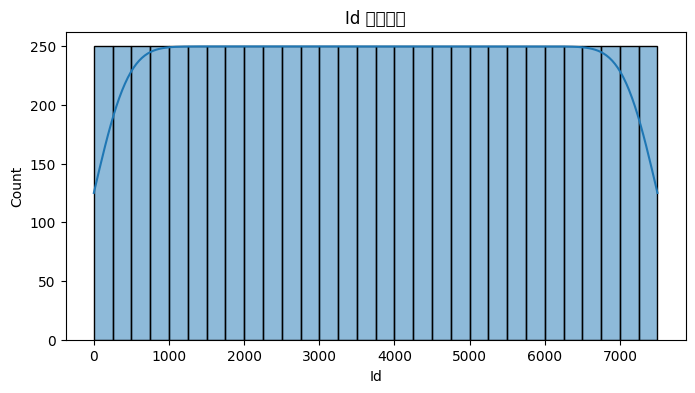

----------------------------------------

📌 變數: Annual Income
count    5.943000e+03
mean     1.366392e+06
std      8.453392e+05
min      1.645970e+05
25%      8.443410e+05
50%      1.168386e+06
75%      1.640137e+06
max      1.014934e+07
Name: Annual Income, dtype: float64
⚠️ 缺失值: 1557 (20.76%)


C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


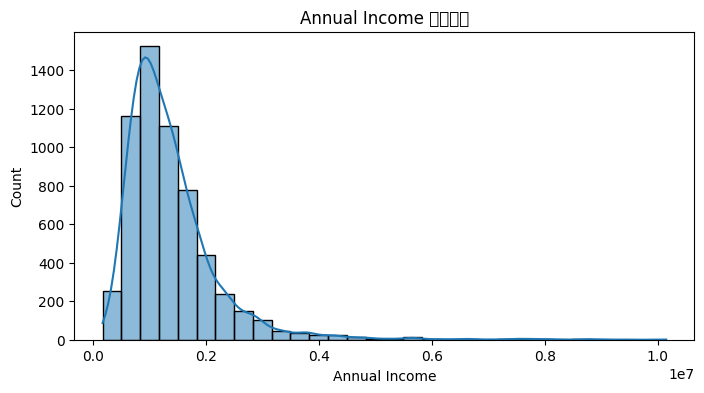

C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


----------------------------------------

📌 變數: Tax Liens
count    7500.000000
mean        0.030133
std         0.271604
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.000000
Name: Tax Liens, dtype: float64
⚠️ 缺失值: 0 (0.00%)


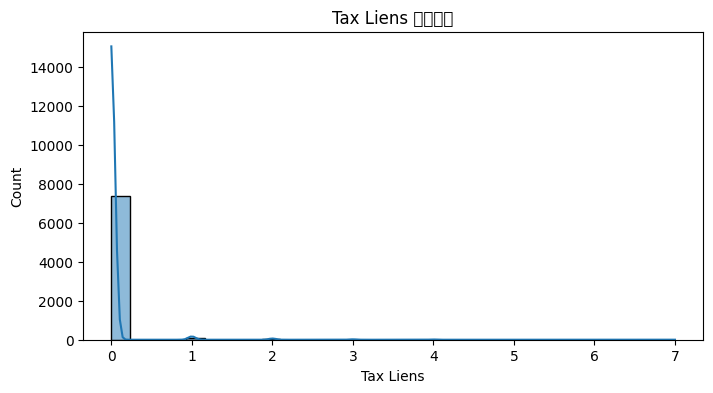

----------------------------------------

📌 變數: Number of Open Accounts
count    7500.000000
mean       11.130933
std         4.908924
min         2.000000
25%         8.000000
50%        10.000000
75%        14.000000
max        43.000000
Name: Number of Open Accounts, dtype: float64
⚠️ 缺失值: 0 (0.00%)


C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


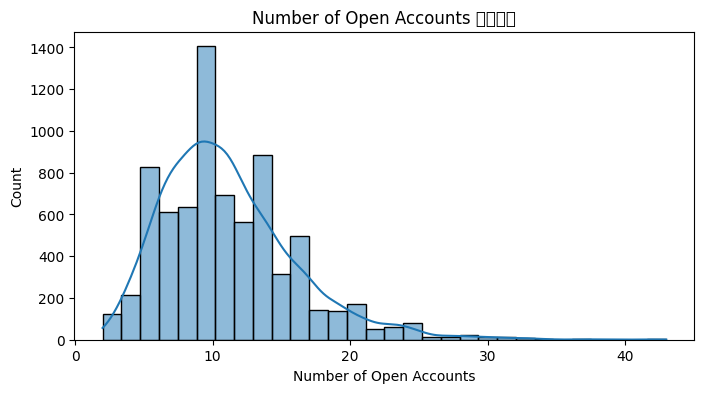

----------------------------------------

📌 變數: Years of Credit History
count    7500.000000
mean       18.317467
std         7.041946
min         4.000000
25%        13.500000
50%        17.000000
75%        21.800000
max        57.700000
Name: Years of Credit History, dtype: float64
⚠️ 缺失值: 0 (0.00%)


C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


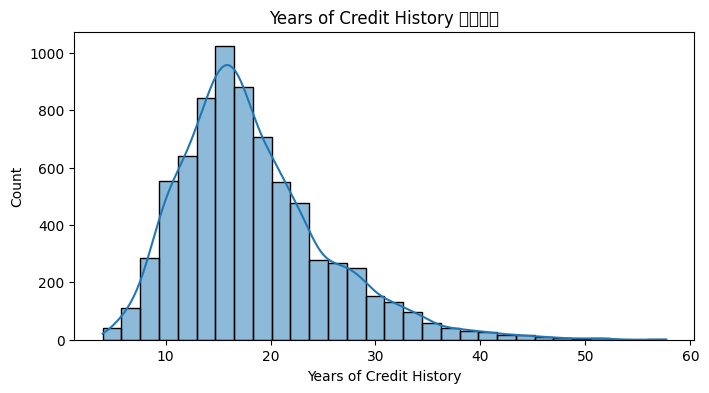

----------------------------------------

📌 變數: Maximum Open Credit
count    7.500000e+03
mean     9.451537e+05
std      1.602622e+07
min      0.000000e+00
25%      2.792295e+05
50%      4.781590e+05
75%      7.935015e+05
max      1.304726e+09
Name: Maximum Open Credit, dtype: float64
⚠️ 缺失值: 0 (0.00%)


C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


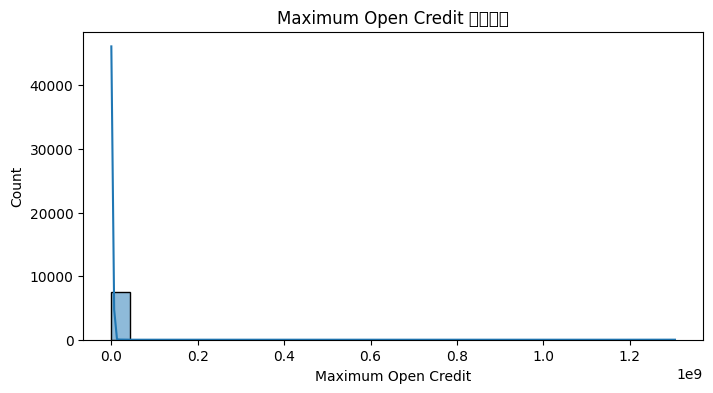

----------------------------------------

📌 變數: Number of Credit Problems
count    7500.000000
mean        0.170000
std         0.498598
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.000000
Name: Number of Credit Problems, dtype: float64
⚠️ 缺失值: 0 (0.00%)


C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


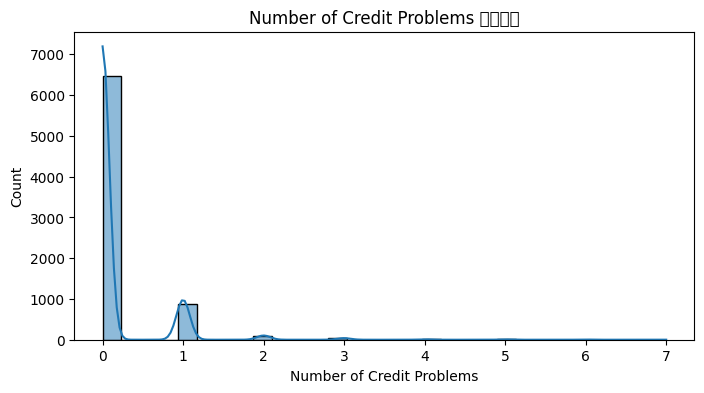

C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


----------------------------------------

📌 變數: Months since last delinquent
count    3419.000000
mean       34.692600
std        21.688806
min         0.000000
25%        16.000000
50%        32.000000
75%        50.000000
max       118.000000
Name: Months since last delinquent, dtype: float64
⚠️ 缺失值: 4081 (54.41%)


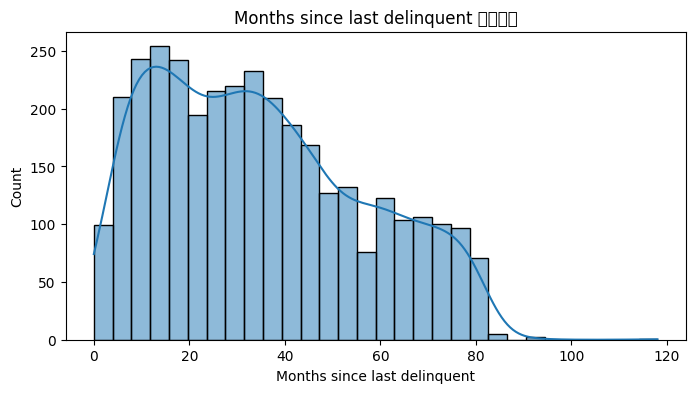

----------------------------------------

📌 變數: Bankruptcies
count    7486.000000
mean        0.117152
std         0.347192
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: Bankruptcies, dtype: float64
⚠️ 缺失值: 14 (0.19%)


C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


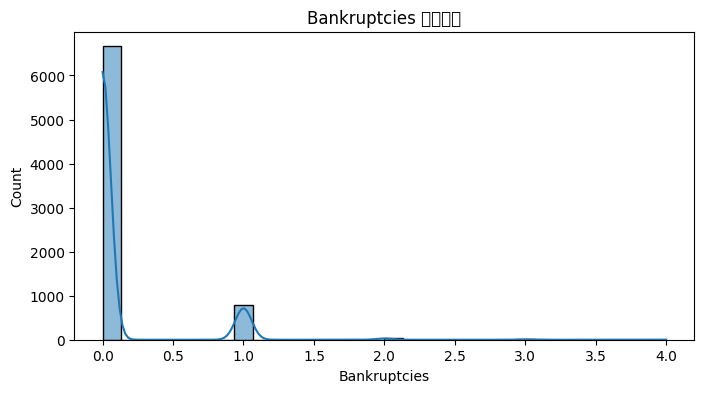

----------------------------------------

📌 變數: Current Loan Amount
count    7.500000e+03
mean     1.187318e+07
std      3.192612e+07
min      1.124200e+04
25%      1.801690e+05
50%      3.095730e+05
75%      5.198820e+05
max      1.000000e+08
Name: Current Loan Amount, dtype: float64
⚠️ 缺失值: 0 (0.00%)


C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


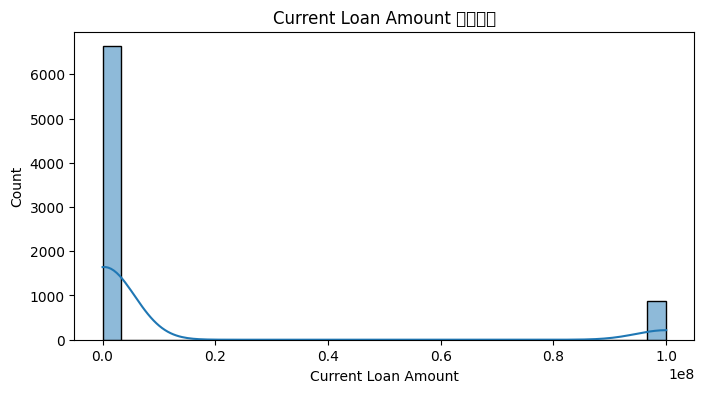

C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


----------------------------------------

📌 變數: Current Credit Balance
count    7.500000e+03
mean     2.898332e+05
std      3.178714e+05
min      0.000000e+00
25%      1.142565e+05
50%      2.093230e+05
75%      3.604062e+05
max      6.506797e+06
Name: Current Credit Balance, dtype: float64
⚠️ 缺失值: 0 (0.00%)


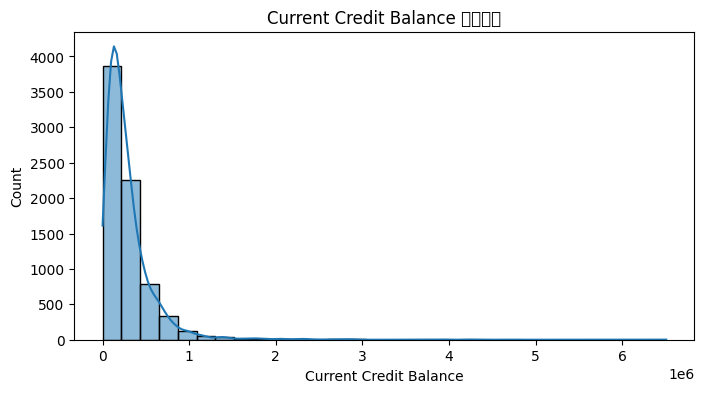

----------------------------------------

📌 變數: Monthly Debt
count      7500.000000
mean      18314.454133
std       11926.764673
min           0.000000
25%       10067.500000
50%       16076.500000
75%       23818.000000
max      136679.000000
Name: Monthly Debt, dtype: float64
⚠️ 缺失值: 0 (0.00%)


C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


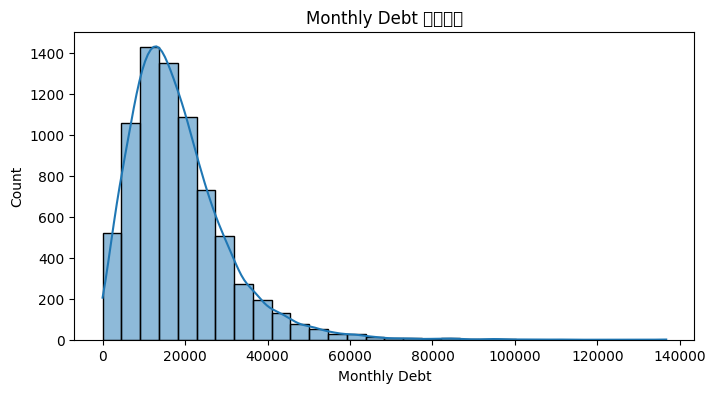

----------------------------------------

📌 變數: Credit Score
count    5943.000000
mean     1151.087498
std      1604.451418
min       585.000000
25%       711.000000
50%       731.000000
75%       743.000000
max      7510.000000
Name: Credit Score, dtype: float64
⚠️ 缺失值: 1557 (20.76%)


C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


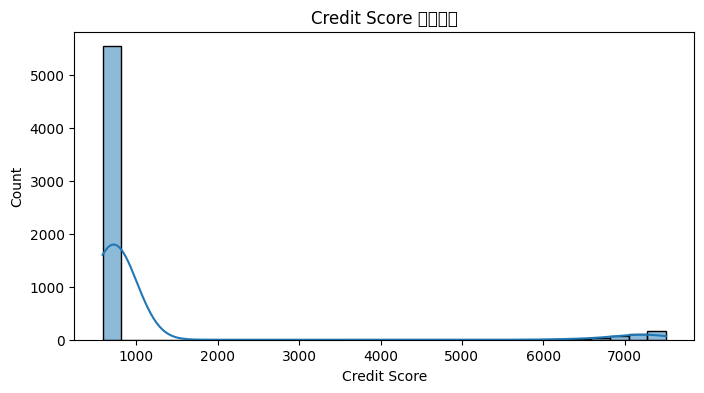

----------------------------------------

📌 變數: Credit Default
count    7500.000000
mean        0.281733
std         0.449874
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Credit Default, dtype: float64
⚠️ 缺失值: 0 (0.00%)


C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


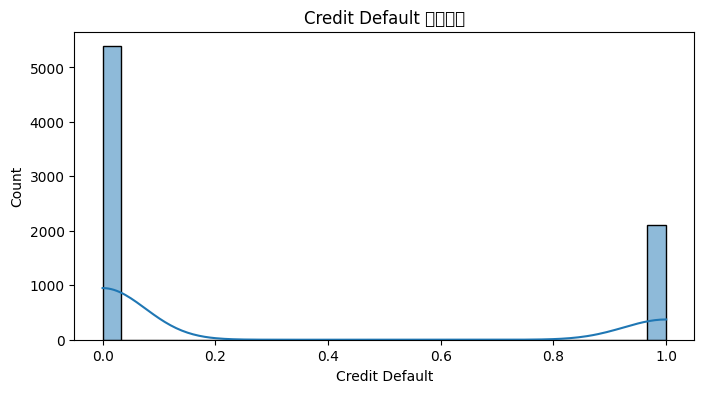

----------------------------------------


In [51]:
numerical_columns = df.select_dtypes(include=['number']).columns
for col in numerical_columns:
    print(f"\n📌 變數: {col}")
    
    # 統計摘要
    print(df[col].describe())

    # 缺失值
    missing_count = df[col].isnull().sum()
    missing_percentage = (missing_count / len(df)) * 100
    print(f"⚠️ 缺失值: {missing_count} ({missing_percentage:.2f}%)")

    # 視覺化分佈
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"{col} 數值分佈")
    plt.show()

    print("-" * 40)  # 分隔線



In [ ]:
# 異常值 、缺失值、欄位物件各內容、欄位物件各數量
1. Home Ownership 房屋持有狀況，為object，無缺失值，有4個類型 'Own Home', 'Home Mortgage', 'Rent', 'Have Mortgage'

2. Annual Income 年收入，為float64，有1577個缺失值

3. Years in current job 工作年資，為object，有371個缺失值，有11個類型 nan, '10+ years', '8 years', '6 years', '7 years', '5 years',
       '1 year', '< 1 year', '4 years', '3 years', '2 years', '9 years'

4. 

5. 

6. 

7. 

8. 

9. 

10. Current Loan Amount目前貸款金額有99999999.0 的異常值

In [17]:
# 檢視數據總覽
df.info()
# 發現種類 float64(12), int64(2), object(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            7500 non-null   int64  
 1   Home Ownership                7500 non-null   object 
 2   Annual Income                 5943 non-null   float64
 3   Years in current job          7129 non-null   object 
 4   Tax Liens                     7500 non-null   float64
 5   Number of Open Accounts       7500 non-null   float64
 6   Years of Credit History       7500 non-null   float64
 7   Maximum Open Credit           7500 non-null   float64
 8   Number of Credit Problems     7500 non-null   float64
 9   Months since last delinquent  3419 non-null   float64
 10  Bankruptcies                  7486 non-null   float64
 11  Purpose                       7500 non-null   object 
 12  Term                          7500 non-null   object 
 13  Cur

In [ ]:
# purpose 目標
# 序號	類別名稱 (Purpose)	中文標誌
# 1	  debt consolidation	債務整合
# 2	  other	其他
# 3	  home improvements	房屋裝修
# 4	  take a trip	旅行
# 5	  buy a car	購車
# 6	  small business	小型企業
# 7	  business loan	商業貸款
# 8	  wedding	婚禮支出
# 9	  educational expenses	教育費用
# 10  buy house	購房
# 11  medical bills	醫療費用
# 12  moving	搬家
# 13  major purchase	大筆消費
# 14  vacation	休閒度假
# 15  renewable energy	可再生能源

In [11]:
# 檢視數據的統計摘要
df.describe()

,Id,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,7500.000000,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,3749.500000,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,2165.207842,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,0.000000,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,1874.750000,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,3749.500000,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,5624.250000,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,7499.000000,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [10]:
# 檢查缺失值
df.isnull().sum()

Id                                 0
Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

In [ ]:
"""
欄位名稱	繁體中文說明
Id	客戶 ID（唯一識別碼）
Home Ownership	房屋持有狀況（Own Home: 自有房產, Rent: 租房, Home Mortgage: 房貸）
Annual Income	年收入（申請人的年度收入）
Years in current job	目前工作的年數（如 10+ years, 5 years, <1 year，需轉換為數值）
Tax Liens	稅務留置權數量（是否因未繳稅款被政府扣押資產）
Number of Open Accounts	開啟的信貸帳戶數量（目前持有的信用卡、貸款數）
Years of Credit History	信用歷史年數（客戶擁有信貸紀錄的總年數）
Maximum Open Credit	最高可用信貸額度（過去曾獲得的最大信貸額度）
Number of Credit Problems	信用問題數量（如遲繳、違約等信用問題的總數）
Months since last delinquent	距離上次違約的月數（若為 0，代表未違約）
Bankruptcies	破產次數（申請人過去申請破產的次數）
Purpose	貸款用途（如 debt con: 債務整合, home im: 房屋裝修, other: 其他）
Term	貸款期限（Short: 短期貸款, Long: 長期貸款）
Current Loan Amount	目前貸款金額（客戶當前貸款的總金額）
Current Credit Balance	當前信用卡/貸款餘額（未償還的信貸餘額）
Monthly Debt	每月負債（申請人每月的貸款或信用卡還款額）
Credit Score	信用評分（數值型變數，影響違約風險）
Credit Default	是否違約（0=未違約，1=違約）（目標變數，分類問題）
"""

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

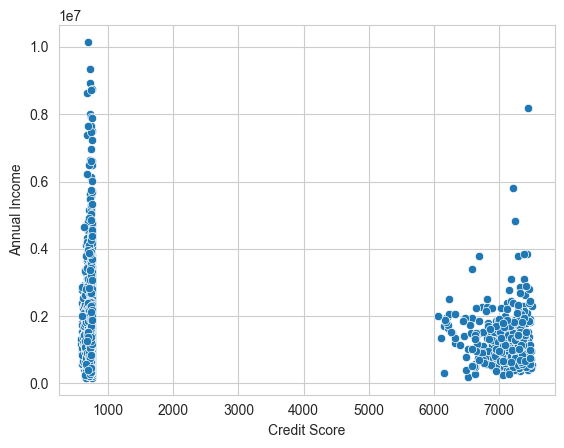

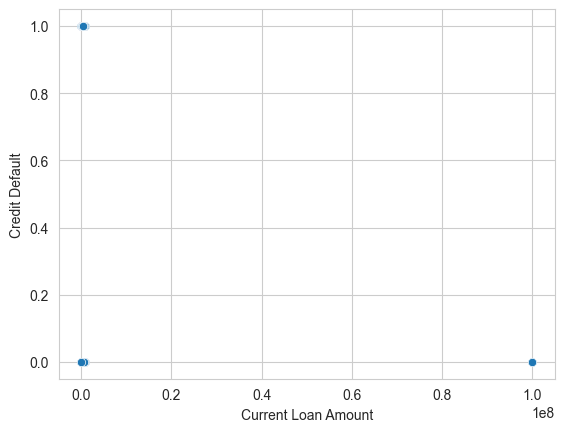

In [45]:
# 繪製散佈圖
sns.scatterplot(data=data, x='Credit Score', y='Annual Income')
plt.show()
sns.scatterplot(data=data, x='Current Loan Amount', y='Credit Default')
# 設定標題和標籤
# plt.title('Petal Length vs Petal Width by Species', fontsize=16)
# plt.xlabel('Petal Length (cm)', fontsize=12)
# plt.ylabel('Petal Width (cm)', fontsize=12)
plt.show()

In [46]:
data[["Annual Income","Current Loan Amount" , "Years of Credit History", "Credit Score", "Credit Default"]].corr()

,Annual Income,Current Loan Amount,Years of Credit History,Credit Score,Credit Default
Annual Income,1.000000,0.032082,0.186531,-0.037832,-0.101375
Current Loan Amount,0.032082,1.000000,0.010623,-0.108552,-0.226522
Years of Credit History,0.186531,0.010623,1.000000,-0.015683,-0.020567
Credit Score,-0.037832,-0.108552,-0.015683,1.000000,0.442050
Credit Default,-0.101375,-0.226522,-0.020567,0.442050,1.000000


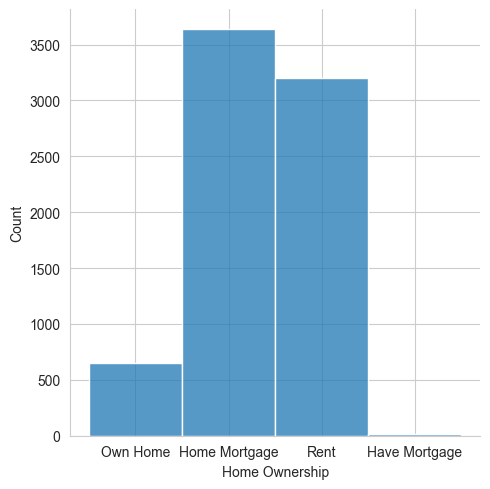

Home Ownership
Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: count, dtype: int64

In [50]:
# 畫出 房子是否為貸款還是租任 的直方圖，並分成四類
sns.displot(data=data, x='Home Ownership')
plt.show()
df['Home Ownership'].value_counts()

In [59]:
# Have Mortgage太少值將與Home Mortgage合併
df['Home Ownership'] = df['Home Ownership'].replace({'Have Mortgage': 'Home Mortgage'})
df['Home Ownership'].value_counts()

Home Ownership
Home Mortgage    3649
Rent             3204
Own Home          647
Name: count, dtype: int64

In [60]:
# 將類別數據化
df['Home Ownership'] = df['Home Ownership'].replace({
    'Home Mortgage': 1,
    'Rent': 2,
    'Own Home': 3,
}).astype(int)  # 明確轉換為整數
df['Home Ownership'].value_counts()

C:\Users\gn012\AppData\Local\Temp\ipykernel_21840\469700808.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Home Ownership'] = df['Home Ownership'].replace({


Home Ownership
1    3649
2    3204
3     647
Name: count, dtype: int64

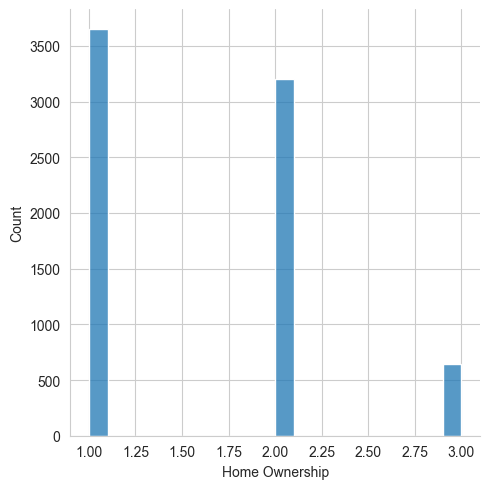

In [62]:
sns.displot(data=df, x='Home Ownership', kind="hist")


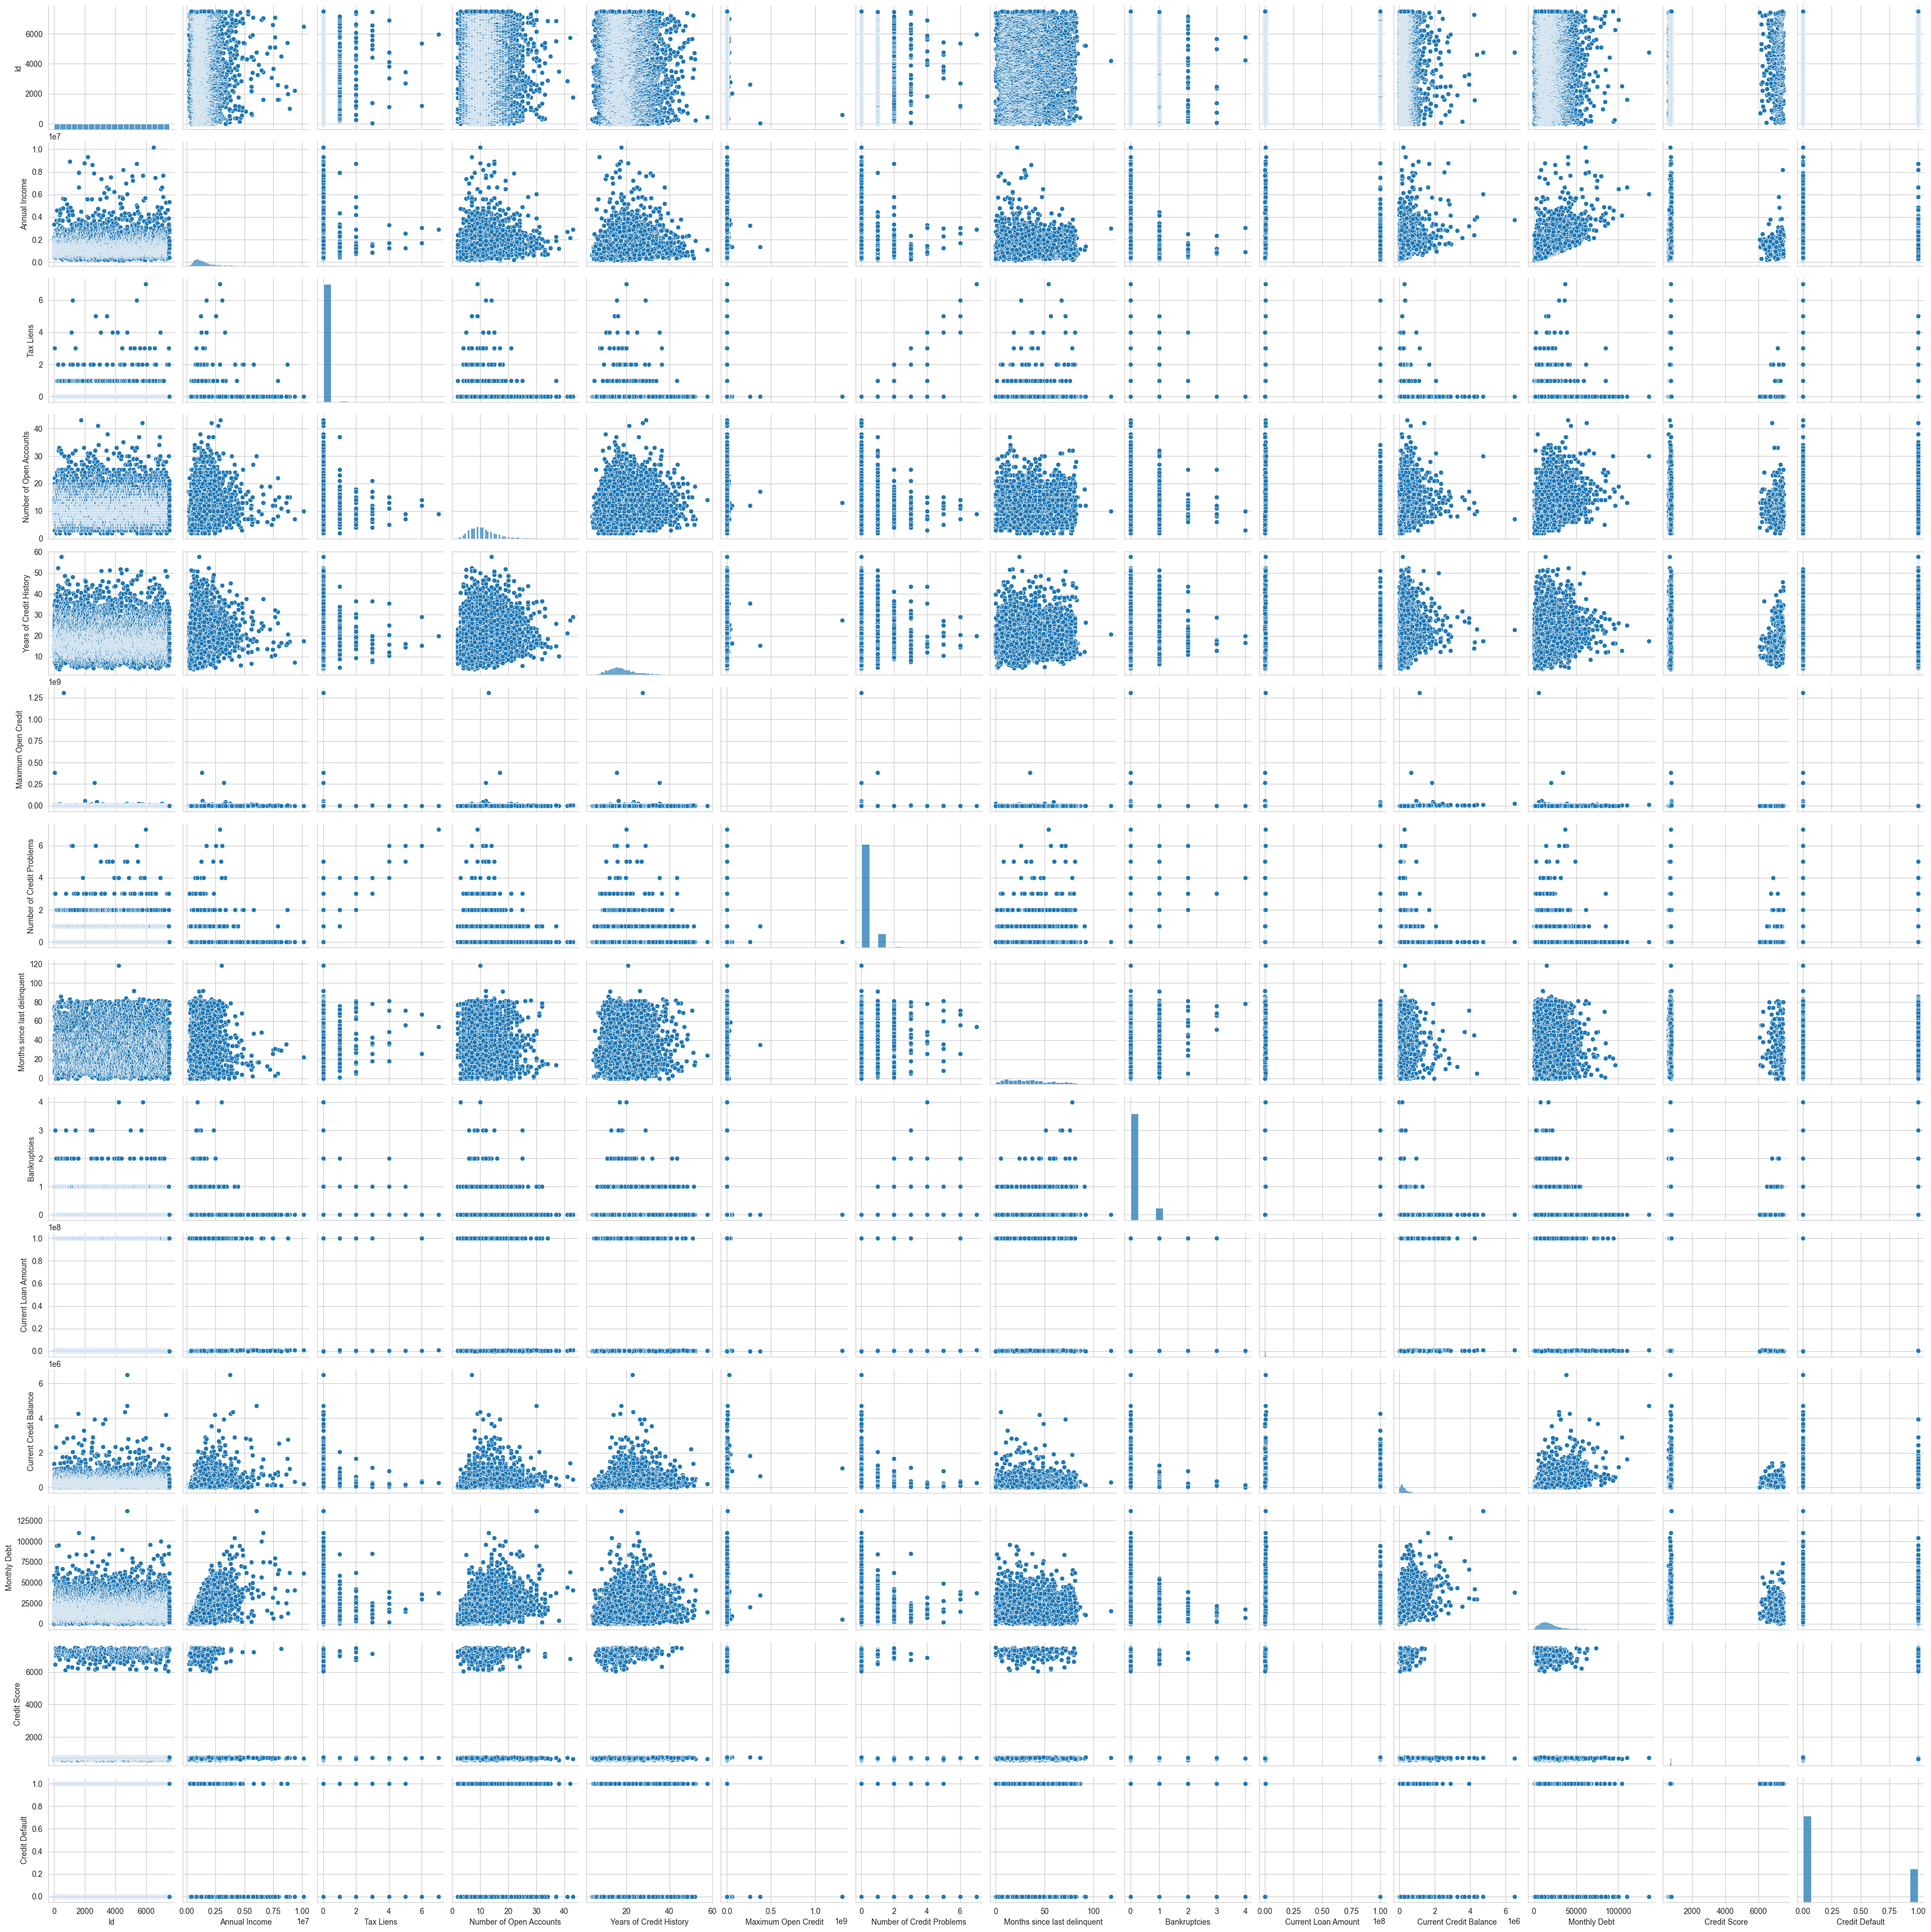

In [65]:
pairplot = sns.pairplot(data = data)

In [66]:
pairplot.savefig("pairplot.png", dpi=300) 